# PREPARATION DE L'ENVIRONEMENT

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

### Importation du dataSet


In [2]:
df=pd.read_excel("superstore_sales.xlsx")

df

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.1400,35.460,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.0360,9.720,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.6400,8.170,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.0550,4.820,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.7700,4.700,Medium,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,CA-2014-115427,2014-12-31,2015-01-04,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.890,Medium,2014
51286,MO-2014-2560,2014-12-31,2015-01-05,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.490,Medium,2014
51287,MX-2014-110527,2014-12-31,2015-01-02,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.350,Medium,2014
51288,MX-2014-114783,2014-12-31,2015-01-06,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.199,Medium,2014


### Visualisation des variables

In [3]:
#Il n'y a aucune valeur manquante et les données sont au bon format 
#La variable year pourrait etre aussi en datetime64, mais, la considerer comme int ne nous derangera pas dans l'analyse
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

In [4]:
#On a une vue d'ensemble des caracteristiques des variables
#Ça nous permet de répondre à des questions comme "le mode d'expédition préféré des clients" ou "le produit le plus vendu"
df.describe(include='all')

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
count,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,...,51290,51290,51290,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290,51290.000000
unique,25035,NaN,NaN,4,795,3,1094,147,7,13,...,3,17,3788,NaN,NaN,NaN,NaN,NaN,4,NaN
top,CA-2014-100111,NaN,NaN,Standard Class,Muhammed Yedwab,Consumer,California,United States,APAC,Central,...,Office Supplies,Binders,Staples,NaN,NaN,NaN,NaN,NaN,Medium,NaN
freq,14,NaN,NaN,30775,108,26518,2001,9994,11002,11117,...,31273,6152,227,NaN,NaN,NaN,NaN,NaN,29433,NaN
mean,NaN,2013-05-11 21:26:49.155780864,2013-05-15 20:42:42.745174528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,246.490581,3.476545,0.142908,28.641740,26.375818,NaN,2012.777208
min,NaN,2011-01-01 00:00:00,2011-01-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000,0.002000,NaN,2011.000000
25%,NaN,2012-06-19 00:00:00,2012-06-23 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,30.758625,2.000000,0.000000,0.000000,2.610000,NaN,2012.000000
50%,NaN,2013-07-08 00:00:00,2013-07-12 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,85.053000,3.000000,0.000000,9.240000,7.790000,NaN,2013.000000
75%,NaN,2014-05-22 00:00:00,2014-05-26 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,251.053200,5.000000,0.200000,36.810000,24.450000,NaN,2014.000000
max,NaN,2014-12-31 00:00:00,2015-01-07 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,22638.480000,14.000000,0.850000,8399.976000,933.570000,NaN,2014.000000


In [5]:
#On regarde uniquement les variables quantitatives
df.select_dtypes(np.number)

,sales,quantity,discount,profit,shipping_cost,year
0,408.300,2,0.0,106.1400,35.460,2011
1,120.366,3,0.1,36.0360,9.720,2011
2,66.120,4,0.0,29.6400,8.170,2011
3,44.865,3,0.5,-26.0550,4.820,2011
4,113.670,5,0.1,37.7700,4.700,2011
...,...,...,...,...,...,...
51285,13.904,2,0.2,4.5188,0.890,2014
51286,3.990,1,0.0,0.4200,0.490,2014
51287,26.400,3,0.0,12.3600,0.350,2014
51288,7.120,1,0.0,0.5600,0.199,2014


In [6]:
#On regarde uniquement les variables catégorielles
df.select_dtypes(exclude=np.number)

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,product_id,category,sub_category,product_name,order_priority
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",Medium
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",Medium
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",High
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",High
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,CA-2014-115427,2014-12-31,2015-01-04,Standard Class,Erica Bern,Corporate,California,United States,US,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",Medium
51286,MO-2014-2560,2014-12-31,2015-01-05,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,OFF-WIL-10001069,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",Medium
51287,MX-2014-110527,2014-12-31,2015-01-02,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,OFF-LA-10004182,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",Medium
51288,MX-2014-114783,2014-12-31,2015-01-06,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,OFF-LA-10000413,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",Medium


# Analyse exploratoire des données

## STRICTE MINIMUM

### 1 ) Tendance globales des ventes

In [7]:
#On regroupe les ventes par années puis on fait la somme des quantités vendues
ventes_par_annee = df.groupby('year')['quantity'].sum()

In [8]:
#On voit ici que les ventes augmentent au fil des années. On va l'illustrer dans un graphique
ventes_par_annee

year
2011    31443
2012    38111
2013    48136
2014    60622
Name: quantity, dtype: int64

Dans le graphique ci dessous on remarque une augmentation croissante des ventes au fil des annees 

(array([25000., 30000., 35000., 40000., 45000., 50000., 55000., 60000.,
        65000.]),
 [Text(0, 25000.0, '25000'),
  Text(0, 30000.0, '30000'),
  Text(0, 35000.0, '35000'),
  Text(0, 40000.0, '40000'),
  Text(0, 45000.0, '45000'),
  Text(0, 50000.0, '50000'),
  Text(0, 55000.0, '55000'),
  Text(0, 60000.0, '60000'),
  Text(0, 65000.0, '65000')])

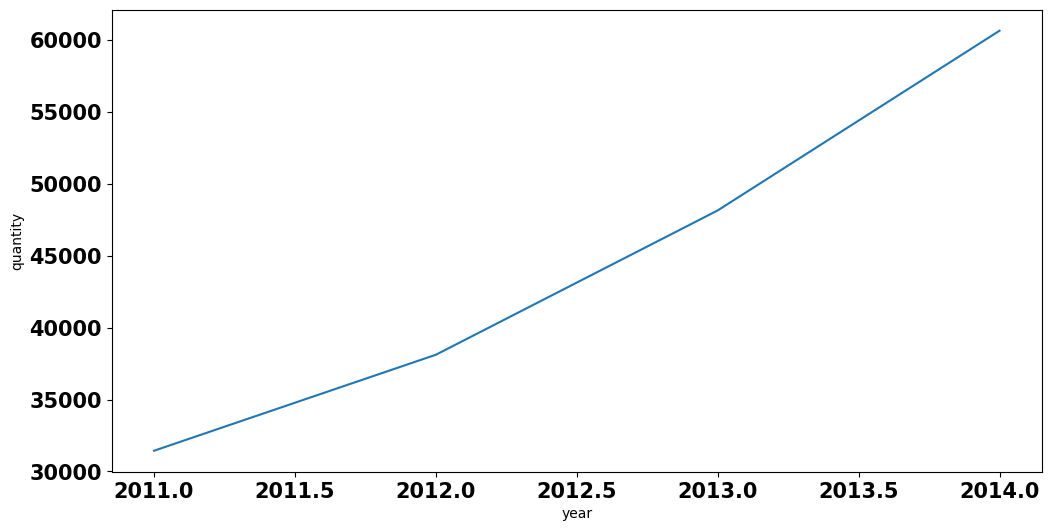

In [9]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=ventes_par_annee, x='year', y=ventes_par_annee)
plt.xticks(fontsize=15, fontweight='bold')
plt.yticks(fontsize=15, fontweight='bold')

### 2 ) 10 premiers produits par ventes

In [10]:
#Les dix (10) premiers produits par vente

ten_bests=sales_par_produit.nlargest(10)
ten_bests

NameError: name 'sales_par_produit' is not defined

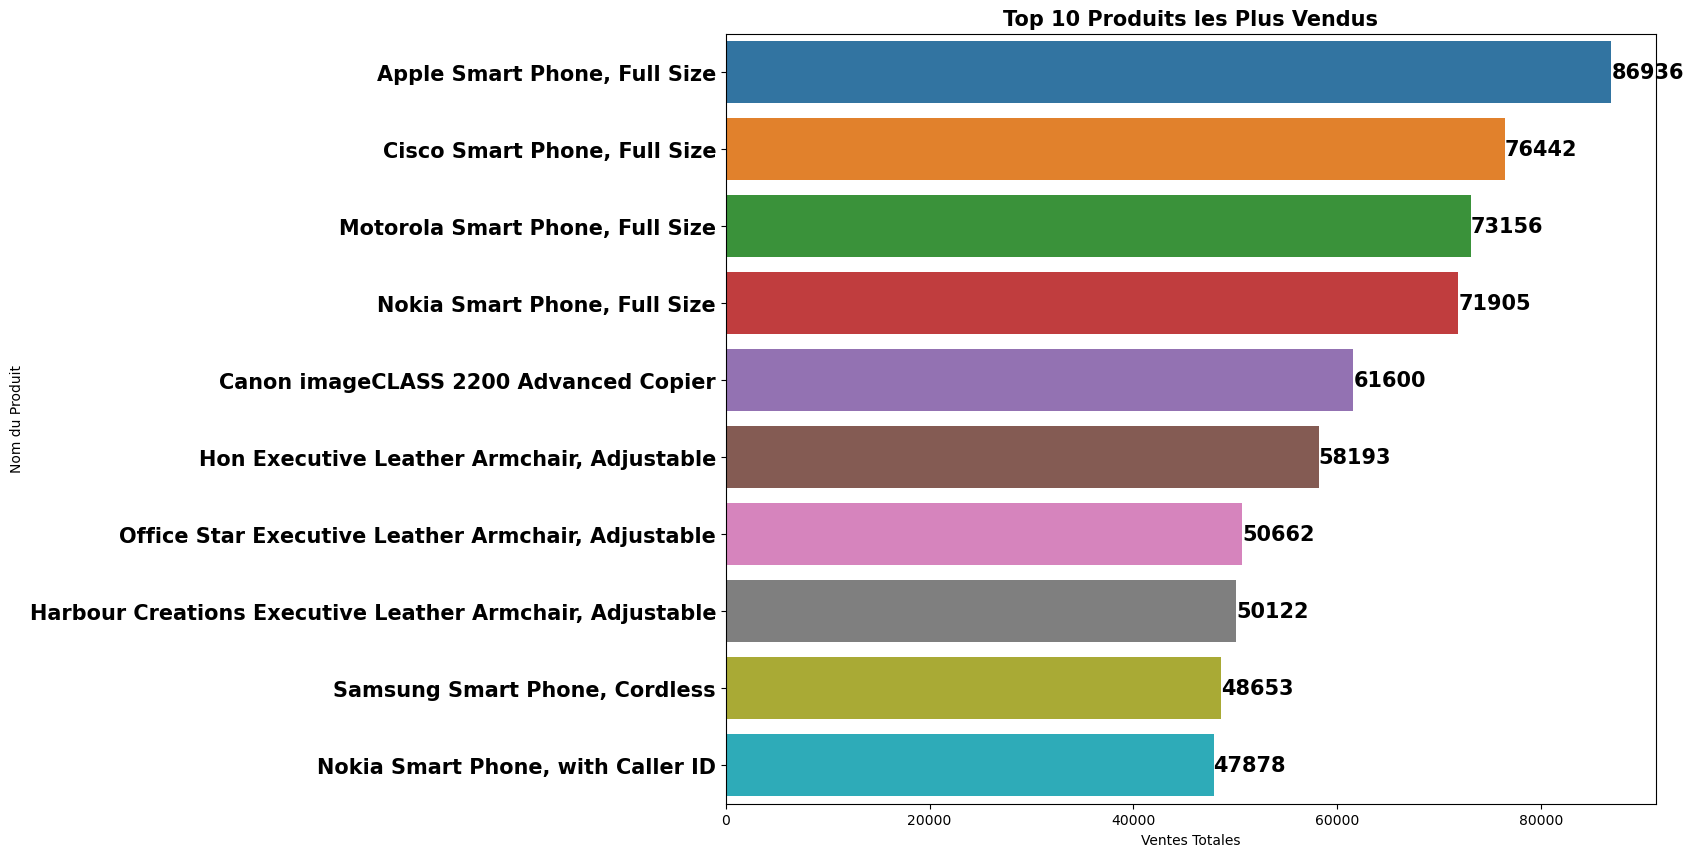

In [ ]:
#Version horizontale

plt.figure(figsize=(12, 10))
ax = sns.barplot(data=df_ten_bests, y=df_ten_bests.index, x='values')

# Ajuster la taille des étiquettes de l'axe des ordonnées
plt.gca().set_yticklabels(df_ten_bests.index, fontsize=15, fontweight='bold')

plt.title('Top 10 Produits les Plus Vendus', fontsize=15, fontweight='bold')
plt.ylabel('Nom du Produit')
plt.xlabel('Ventes Totales')

# Ajouter les annotations
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_width()), 
                (p.get_x() + p.get_width() + 0.4, p.get_y() + p.get_height() / 2), 
                ha='left', va='center', color='black', fontsize=15, fontweight='bold')

plt.show()

### 3 ) Les produits les plus vendus en terme de quantité

In [ ]:
#On regroupe les produits par leurs noms et on fait la somme des quantités vendues
ventes_par_produit = df.groupby('product_name')['quantity'].sum()

In [ ]:
ventes_par_produit

product_name
"While you Were Out" Message Book, One Form per Page                                                    8
#10 Gummed Flap White Envelopes, 100/Box                                                               11
#10 Self-Seal White Envelopes                                                                          10
#10 White Business Envelopes,4 1/8 x 9 1/2                                                             32
#10- 4 1/8" x 9 1/2" Recycled Envelopes                                                                37
                                                                                                       ..
iKross Bluetooth Portable Keyboard + Cell Phone Stand Holder + Brush for Apple iPhone 5S 5C 5, 4S 4    24
iOttie HLCRIO102 Car Mount                                                                             12
iOttie XL Car Mount                                                                                    14
invisibleSHIELD by ZAGG Smudge-Fr

In [ ]:
#Les 10 produits les plus vendus en terme de quantité
ten_bests_quantity=ventes_par_produit.nlargest(10)
ten_bests_quantity

product_name
Staples                                  876
Cardinal Index Tab, Clear                337
Eldon File Cart, Single Width            321
Rogers File Cart, Single Width           262
Sanford Pencil Sharpener, Water Color    259
Stockwell Paper Clips, Assorted Sizes    253
Avery Index Tab, Clear                   252
Ibico Index Tab, Clear                   251
Smead File Cart, Single Width            250
Stanley Pencil Sharpener, Water Color    242
Name: quantity, dtype: int64

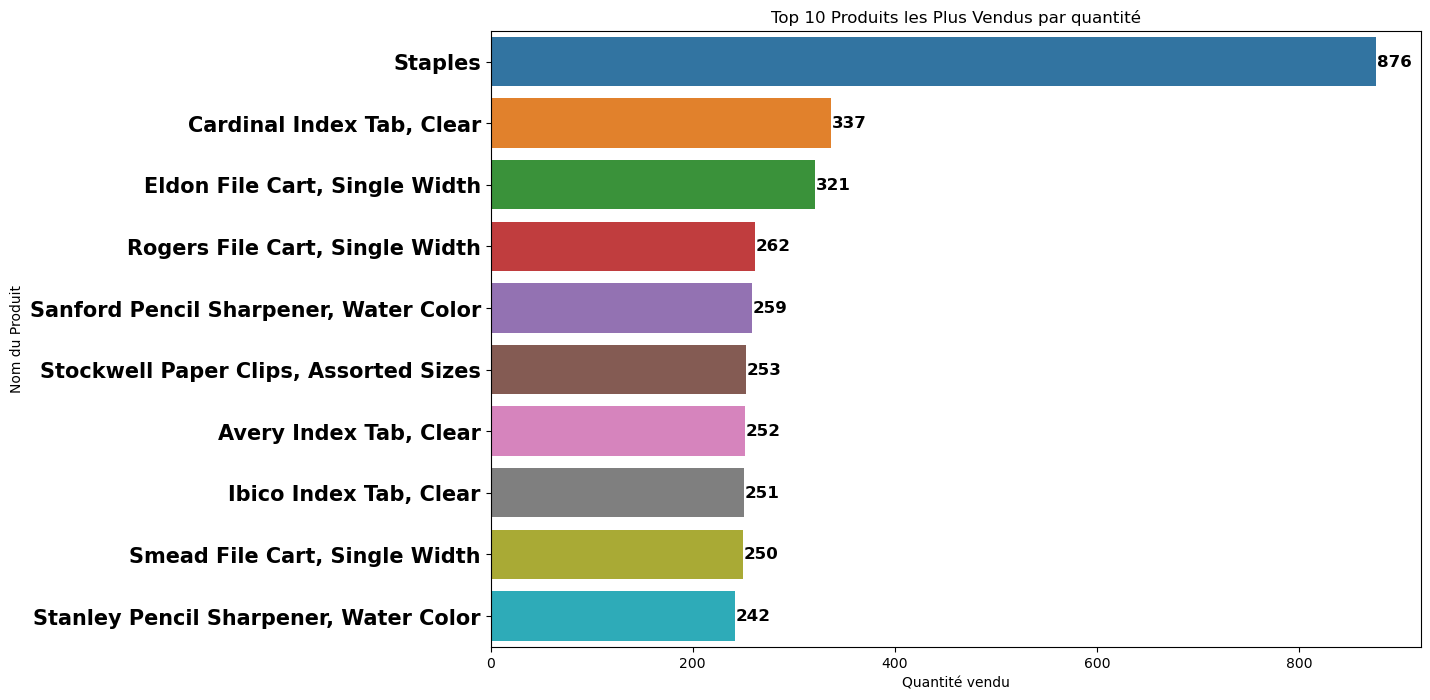

In [ ]:
#Version horizontale

plt.figure(figsize=(12, 8))
graph_ten_best_q = sns.barplot(data=df_ten_bests_quantity, y=df_ten_bests_quantity.index, x='values')
plt.title('Top 10 Produits les Plus Vendus par quantité')
plt.ylabel('Nom du Produit')
plt.xlabel('Quantité vendu')

# Ajuster la taille des étiquettes de l'axe des ordonnées
plt.gca().set_yticklabels(df_ten_bests_quantity.index, fontsize=15, fontweight='bold')

# Les valeurs indiquées à droite des barres
for p in graph_ten_best_q.patches:
    graph_ten_best_q.annotate('{:.0f}'.format(p.get_width()), 
                              (p.get_x() + p.get_width() + 0.4, p.get_y() + p.get_height() / 2), 
                              ha='left', va='center', color='black', fontsize=12, fontweight='bold')

plt.show()

### 3 ) Le moyen d'expedition prefere des clients

In [ ]:
#Les fréquences des différentes modalités de la variable ship_mode
#On voit que standard class est de loin le plus utilisé
df['ship_mode'].value_counts()

ship_mode
Standard Class    30775
Second Class      10309
First Class        7505
Same Day           2701
Name: count, dtype: int64

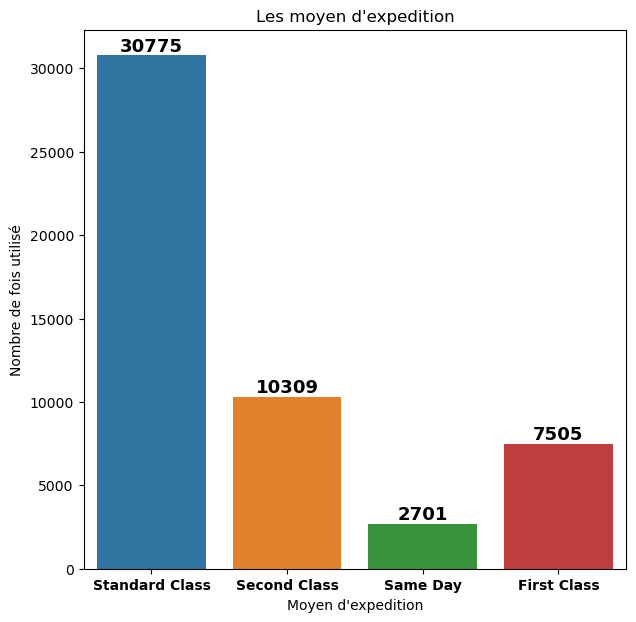

In [ ]:
plt.figure(figsize=(7, 7))
graph_ship = sns.countplot(data=df, x="ship_mode")
plt.title("Les moyen d'expedition")
plt.xlabel("Moyen d'expedition")
plt.ylabel('Nombre de fois utilisé')

#Les valeurs indiquées au-dessus des barres
for p in graph_ship.patches:
        graph_ship.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black', fontsize=13, fontweight='bold')

plt.xticks(fontsize=10, fontweight='bold')
plt.show()

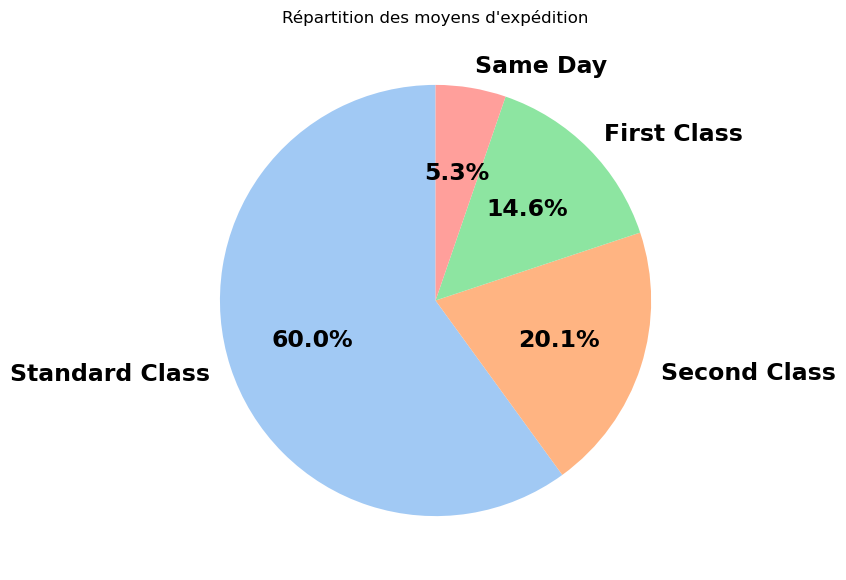

In [ ]:
# Utiliser une palette de couleurs plus claire
colors = sns.color_palette('pastel')

plt.figure(figsize=(7, 7))
plt.pie(df['ship_mode'].value_counts(), labels=df['ship_mode'].value_counts().index, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 17, 'fontweight': 'bold'}, colors=colors)
plt.title("Répartition des moyens d'expédition")
plt.show()

### 5 ) Les categories  et sous categories de produits qui permettent de faire le plus de profit

#### Par categories

In [ ]:
#On regroupe les profits par catégorie et on fait la somme des profits
profit_par_category = df.groupby('category')['profit'].sum()
profit_par_category

category
Furniture          286782.25380
Office Supplies    518473.83430
Technology         663778.73318
Name: profit, dtype: float64

(array([0, 1, 2]),
 [Text(0, 0, 'Furniture'),
  Text(1, 0, 'Office Supplies'),
  Text(2, 0, 'Technology')])

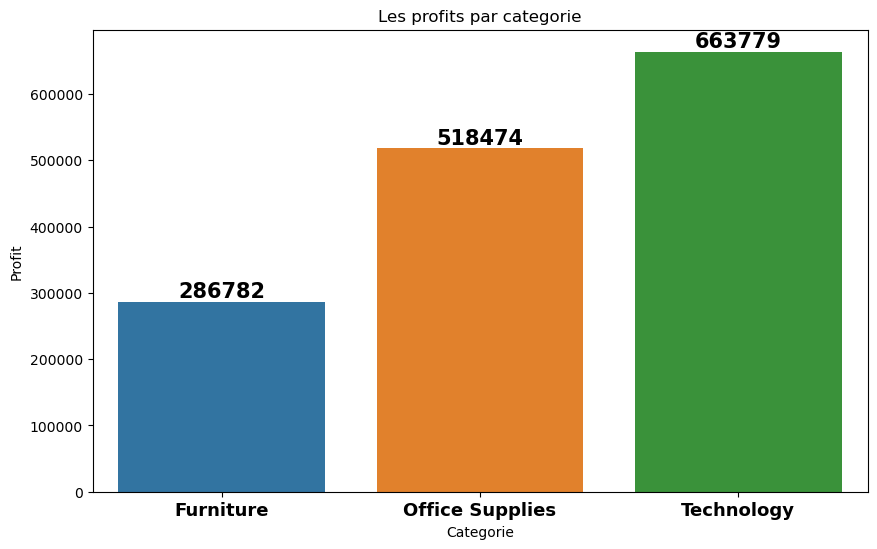

In [ ]:
#Visualisation des profit pare categorie

df_profit_par_category = pd.DataFrame({'values': profit_par_category}) #Transformation de la serie en dataframe

plt.figure(figsize=(10, 6))
graph_cat = sns.barplot(data=df_profit_par_category, x=df_profit_par_category.index, y='values')
plt.title('Les profits par categorie')
plt.xlabel('Categorie')
plt.ylabel('Profit')

#Les valeurs indiquées au-dessus des barres
for p in graph_cat.patches:
        graph_cat.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black', fontsize=15, fontweight='bold')

plt.xticks(fontsize=13, fontweight='bold')

#### Par sous-categories

In [ ]:
profit_par_scategory = df.groupby('sub_category')['profit'].sum()
profit_par_scategory

sub_category
Accessories    129626.30620
Appliances     141680.58940
Art             57953.91090
Binders         72449.84600
Bookcases      161924.41950
Chairs         141973.79750
Copiers        258567.54818
Envelopes       29601.11630
Fasteners       11525.42410
Furnishings     46967.42550
Labels          15010.51200
Machines        58867.87300
Paper           59207.68270
Phones         216717.00580
Storage        108461.48980
Supplies        22583.26310
Tables         -64083.38870
Name: profit, dtype: float64

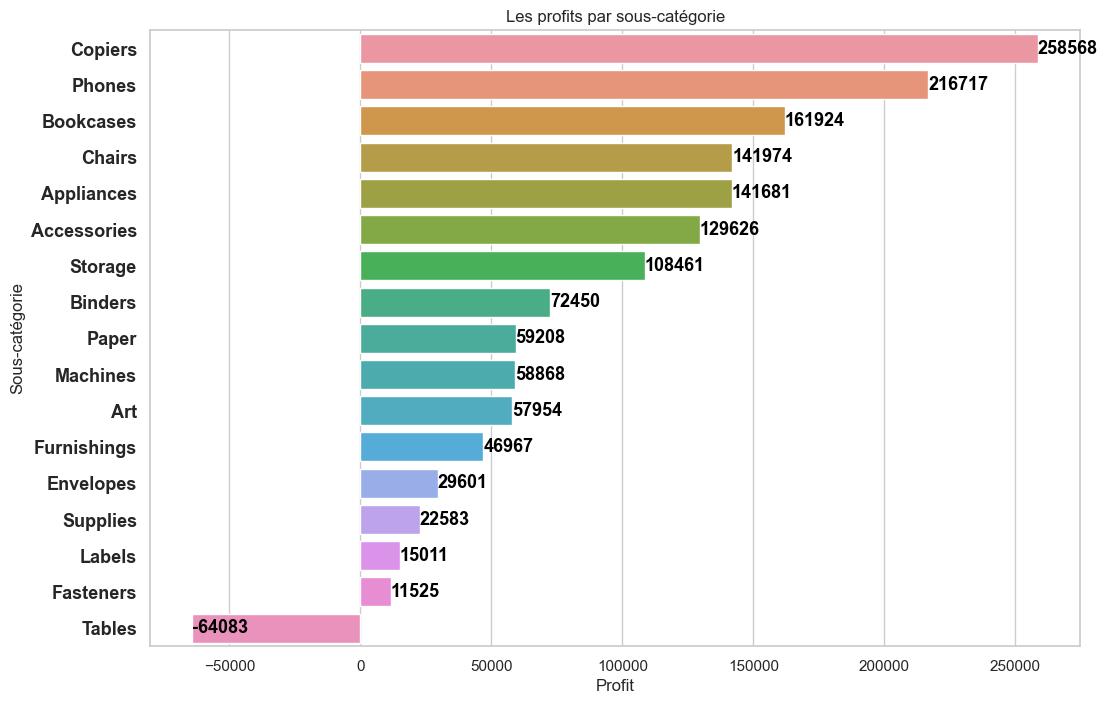

In [ ]:
df_profit_par_scategory = pd.DataFrame({'values': profit_par_scategory})

# Trier les données par valeurs décroissantes
df_profit_par_scategory = df_profit_par_scategory.sort_values('values', ascending=False)

plt.figure(figsize=(12, 8))  # Réduire la taille pour mieux s'adapter au format horizontal
graph_scat = sns.barplot(data=df_profit_par_scategory, y=df_profit_par_scategory.index, x='values')  # Inverser x et y
plt.title('Les profits par sous-catégorie')
plt.xlabel('Profit')
plt.ylabel('Sous-catégorie')  # Inverser les labels des axes

# Les valeurs indiquées à droite des barres
for p in graph_scat.patches:
    graph_scat.annotate('{:.0f}'.format(p.get_width()), (p.get_width(), p.get_y()+0.4),
                        va='center', ha='left',
                        color='black', fontsize=13, fontweight='bold')

plt.yticks(fontsize=13, fontweight='bold')  # Ajuster la taille de la police de l'axe des y
plt.show()

## ANALYSE SUPPLEMENTAIRE

### Les 10 states qui font le plus de profit

state
England                   99907.73100
California                76381.38710
New York                  74038.54860
New South Wales           45273.51400
Ile-de-France             44055.92400
North Rhine-Westphalia    42347.87100
San Salvador              35883.37700
Washington                33402.65170
Michigan                  24463.18760
São Paulo                 21878.02388
Name: profit, dtype: float64


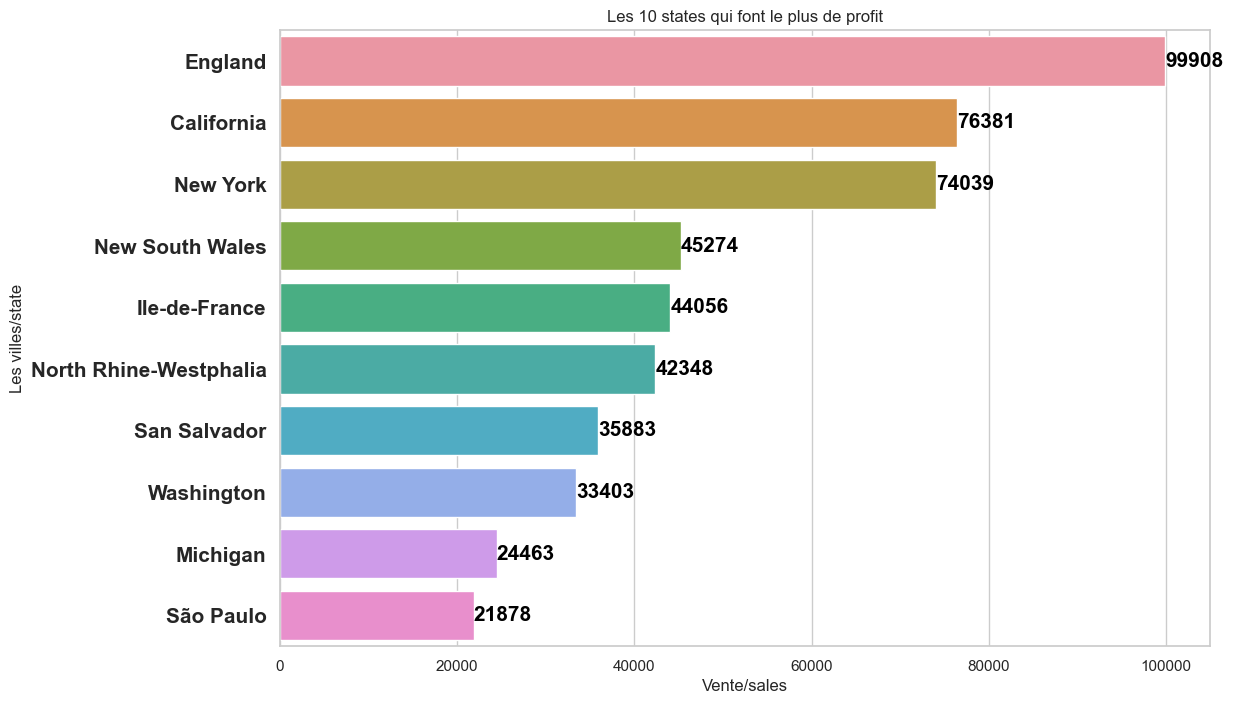

In [ ]:
#Les villes ou states(10) qui font le plus de profit

sales_par_state = df.groupby('state')['profit'].sum()
twenty_bests_state = sales_par_state.nlargest(10)
print(twenty_bests_state)

df_sales_par_state = pd.DataFrame({'values': twenty_bests_state})

plt.figure(figsize=(12, 8))  # Réduire la taille pour mieux s'adapter au format horizontal
graph_sales_state = sns.barplot(data=df_sales_par_state, y=df_sales_par_state.index, x='values')  # Inverser x et y
plt.title('Les 10 states qui font le plus de profit')
plt.xlabel('Vente/sales')
plt.ylabel('Les villes/state')  # Inverser les labels des axes

# Les valeurs indiquées à droite des barres
for p in graph_sales_state.patches:
    graph_sales_state.annotate('{:.0f}'.format(p.get_width()), (p.get_width(), p.get_y()+0.4),
                        va='center', ha='left',
                        color='black', fontsize=15, fontweight='bold')

plt.yticks(fontsize=15, fontweight='bold')  # Ajuster la taille de la police de l'axe des x
plt.show()

#### Comparaison des profit et des ventes sur les states (Tri en fonction du profit)

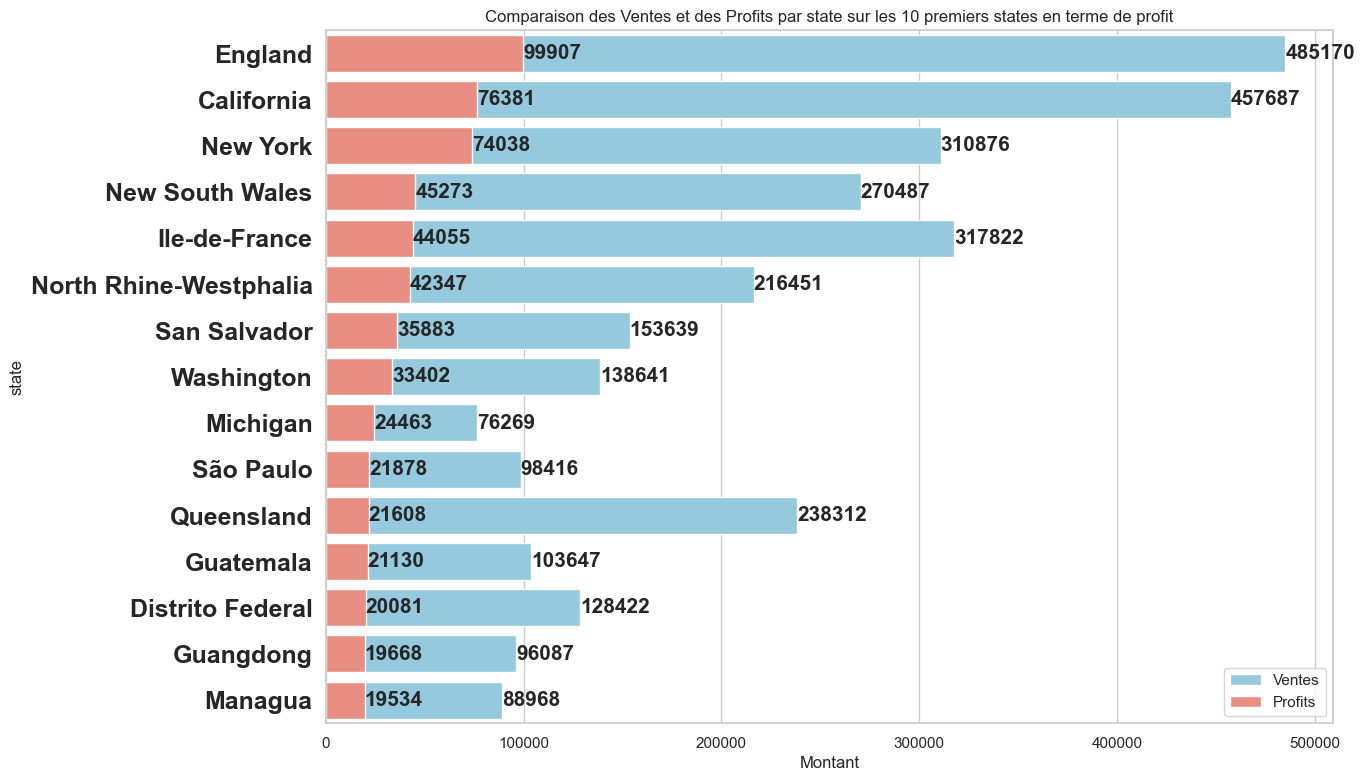

In [ ]:
# Calculer les ventes et les profits par state
ventes_par_state = df.groupby('state')['sales'].sum().reset_index().sort_values(by='sales', ascending=False)
profits_par_state = df.groupby('state')['profit'].sum().reset_index().sort_values(by='profit', ascending=False)

# Fusionner les deux DataFrame
combined_data = pd.merge(profits_par_state, ventes_par_state, on='state', suffixes=('_ventes', '_profits'))

# Sélectionner les 15 premiers états
combined_data = combined_data.head(15)

# Créer un graphique des ventes et des profits par state triés de manière horizontale avec les chiffres à droite
plt.figure(figsize=(13, 9))
sns.barplot(x='sales', y='state', data=combined_data, estimator=sum, ci=None, orient='h', color='skyblue', label='Ventes')
sns.barplot(x='profit', y='state', data=combined_data, estimator=sum, ci=None, orient='h', color='salmon', label='Profits')

# Ajouter les chiffres à droite de chaque barre (ventes)
for index, value in enumerate(combined_data['sales']):
    plt.text(value, index, str(int(value)), ha='left', va='center', fontsize=15, fontweight='bold')

# Ajouter les chiffres à droite de chaque barre (profits)
for index, value in enumerate(combined_data['profit']):
    plt.text(value, index, str(int(value)), ha='left', va='center', fontsize=15, fontweight='bold')

plt.title('Comparaison des Ventes et des Profits par state sur les 10 premiers states en terme de profit')
plt.xlabel('Montant')
plt.ylabel('state')
plt.yticks(fontsize=18, fontweight='bold')
plt.legend()
plt.show()

#### Comparaison des profit et des ventes sur les country

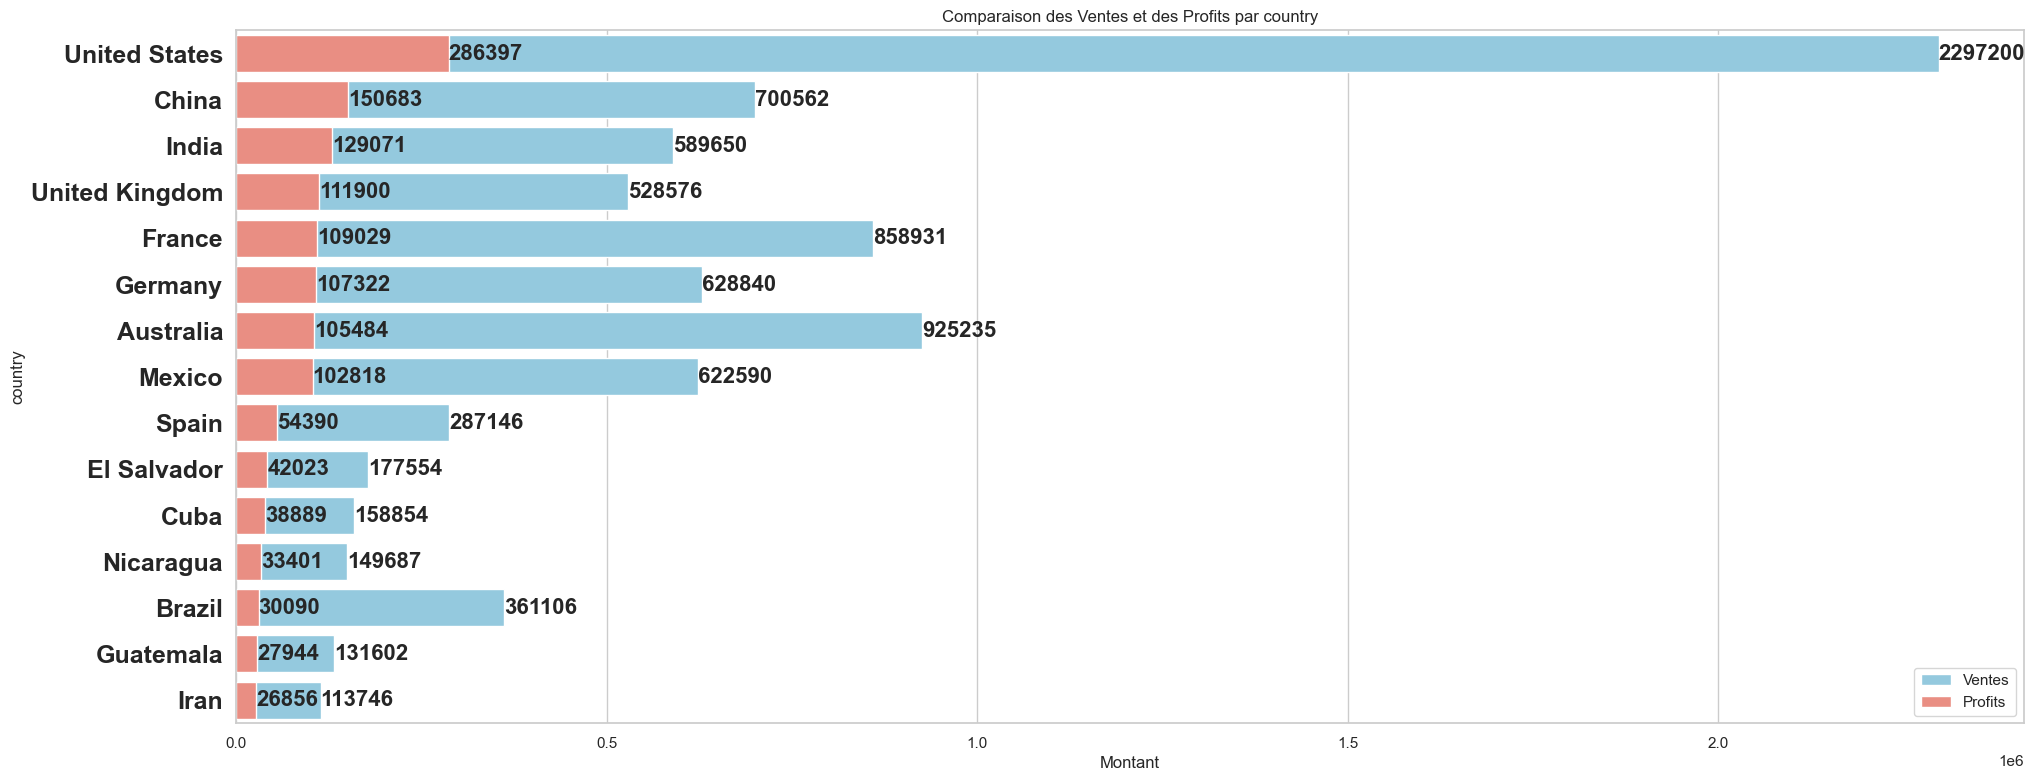

In [ ]:
# Calculer les ventes et les profits par pays
ventes_par_country = df.groupby('country')['sales'].sum().reset_index().sort_values(by='sales', ascending=False)
profits_par_country = df.groupby('country')['profit'].sum().reset_index().sort_values(by='profit', ascending=False)

# Fusionner les deux DataFrame
combined_data = pd.merge(profits_par_country, ventes_par_country, on='country', suffixes=('_ventes', '_profits'))

# Sélectionner les 15 premiers pays
combined_data = combined_data.head(15)

# Créer un graphique des ventes et des profits par pays triés de manière horizontale avec les chiffres à droite
plt.figure(figsize=(13, 9))
sns.barplot(x='sales', y='country', data=combined_data, estimator=sum, ci=None, orient='h', color='skyblue', label='Ventes')
sns.barplot(x='profit', y='country', data=combined_data, estimator=sum, ci=None, orient='h', color='salmon', label='Profits')

# Ajouter les chiffres à droite de chaque barre (ventes)
for index, value in enumerate(combined_data['sales']):
    plt.text(value, index, str(int(value)), ha='left', va='center', fontsize=16, fontweight='bold')

# Ajouter les chiffres à droite de chaque barre (profits)
for index, value in enumerate(combined_data['profit']):
    plt.text(value, index, str(int(value)), ha='left', va='center', fontsize=16, fontweight='bold')

plt.title('Comparaison des Ventes et des Profits par country')
plt.xlabel('Montant')
plt.ylabel('country')
plt.yticks(fontsize=18, fontweight='bold')
plt.subplots_adjust(right=1.50) 
plt.legend()
plt.show()

#### Comparaison des profit et des ventes sur les regions

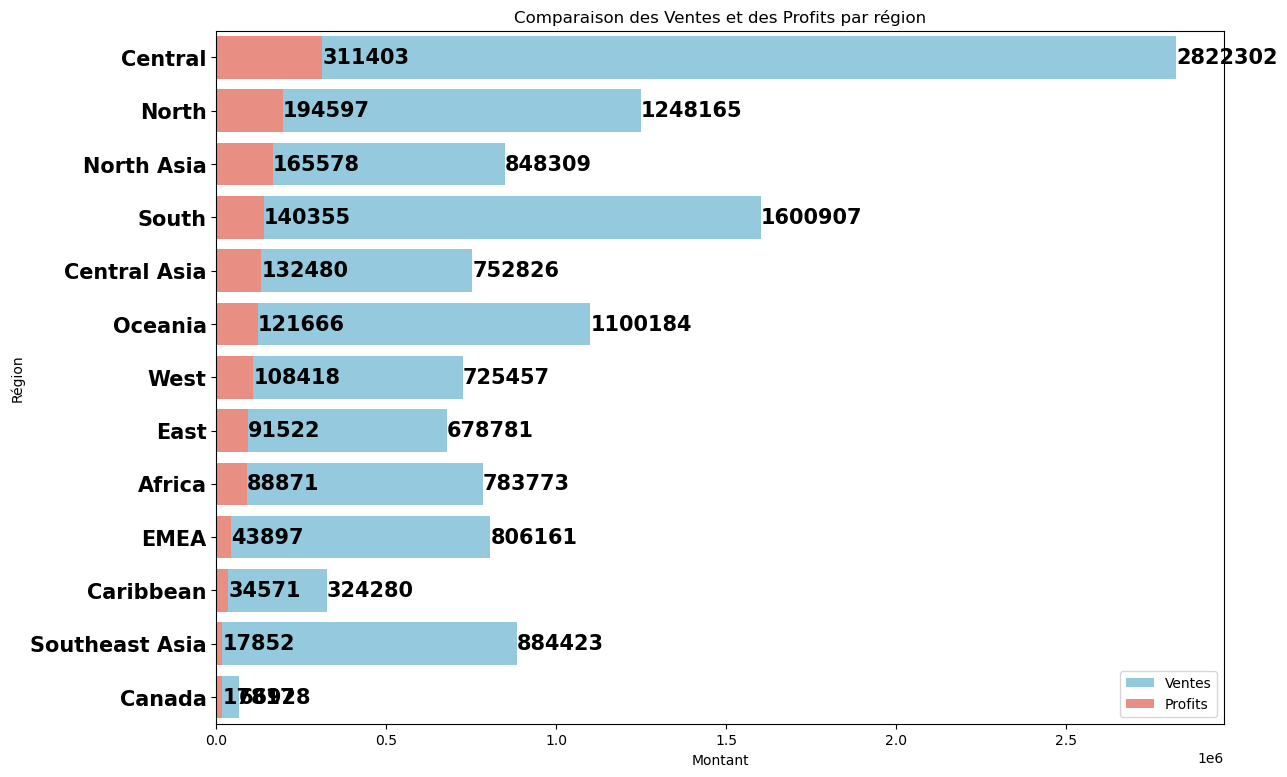

In [11]:
# Calculer les ventes et les profits par région
ventes_par_region = df.groupby('region')['sales'].sum().reset_index().sort_values(by='sales', ascending=False)
profits_par_region = df.groupby('region')['profit'].sum().reset_index().sort_values(by='profit', ascending=False)

# Fusionner les deux DataFrame
combined_data = pd.merge(profits_par_region, ventes_par_region, on='region', suffixes=('_ventes', '_profits'))

# Vérifier si les données ne sont pas vides
if not combined_data.empty:
    # Créer un graphique des ventes et des profits par région triées de manière horizontale avec les chiffres à droite
    plt.figure(figsize=(13, 9))
    sns.barplot(x='sales', y='region', data=combined_data, estimator=sum, ci=None, orient='h', color='skyblue', label='Ventes')
    sns.barplot(x='profit', y='region', data=combined_data, estimator=sum, ci=None, orient='h', color='salmon', label='Profits')

    # Ajouter les chiffres à droite de chaque barre (ventes)
    for index, value in enumerate(combined_data['sales']):
        plt.text(value, index, str(int(value)), ha='left', va='center', fontsize=15, fontweight='bold')

    # Ajouter les chiffres à droite de chaque barre (profits)
    for index, value in enumerate(combined_data['profit']):
        plt.text(value, index, str(int(value)), ha='left', va='center', fontsize=15, fontweight='bold')

    plt.title('Comparaison des Ventes et des Profits par région')
    plt.xlabel('Montant')
    plt.ylabel('Région')
    plt.yticks(fontsize=15, fontweight='bold')
    plt.legend()
    plt.show()
else:
    print("Les données sont vides, impossible de créer le graphique.")


### Les villes/state qui font le moins de profit

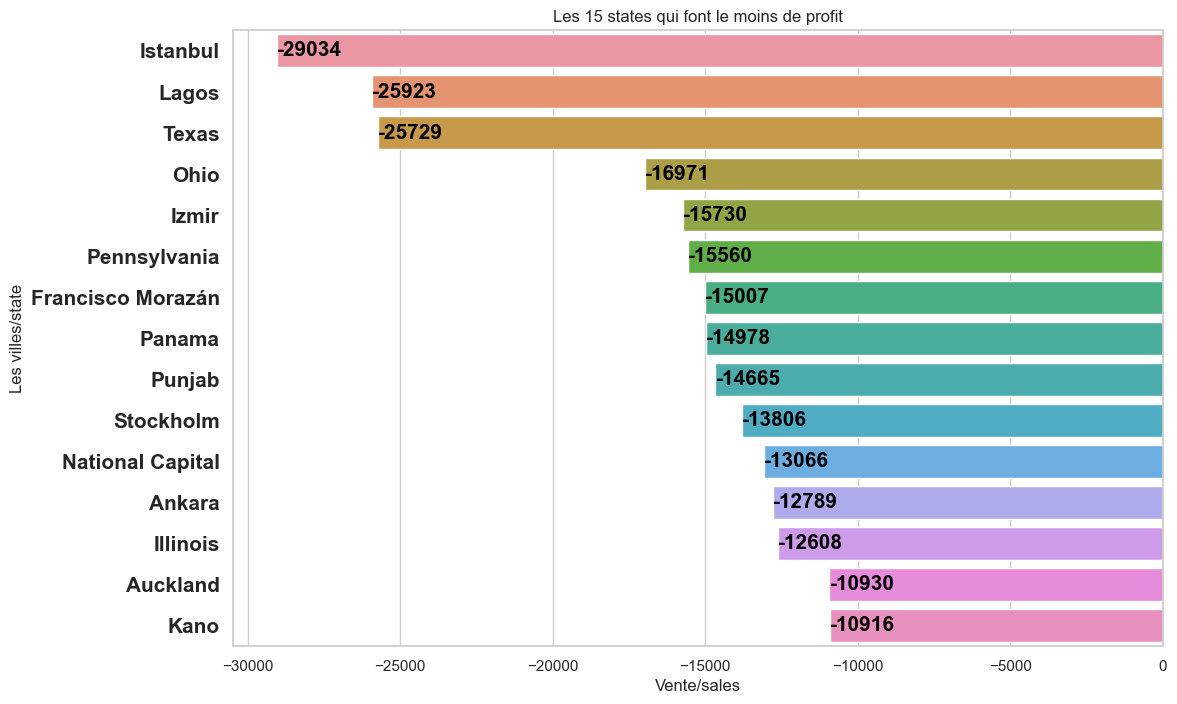

In [ ]:
twenty_worst_states = sales_par_state.nsmallest(15)
df_sales_par_state = pd.DataFrame({'values': twenty_worst_states})

plt.figure(figsize=(12, 8))  # Réduire la taille pour mieux s'adapter au format horizontal
graph_sales_state = sns.barplot(data=df_sales_par_state, y=df_sales_par_state.index, x='values')  # Inverser x et y
plt.title('Les 15 states qui font le moins de profit')
plt.xlabel('Vente/sales')
plt.ylabel('Les villes/state')  # Inverser les labels des axes

# Les valeurs indiquées à droite des barres
for p in graph_sales_state.patches:
    graph_sales_state.annotate('{:.0f}'.format(p.get_width()), (p.get_width(), p.get_y()+0.4),
                        va='center', ha='left',
                        color='black', fontsize=15, fontweight='bold')

plt.yticks(fontsize=15, fontweight='bold')  # Ajuster la taille de la police de l'axe des y
plt.show()

### Les country qui font le moins de profits

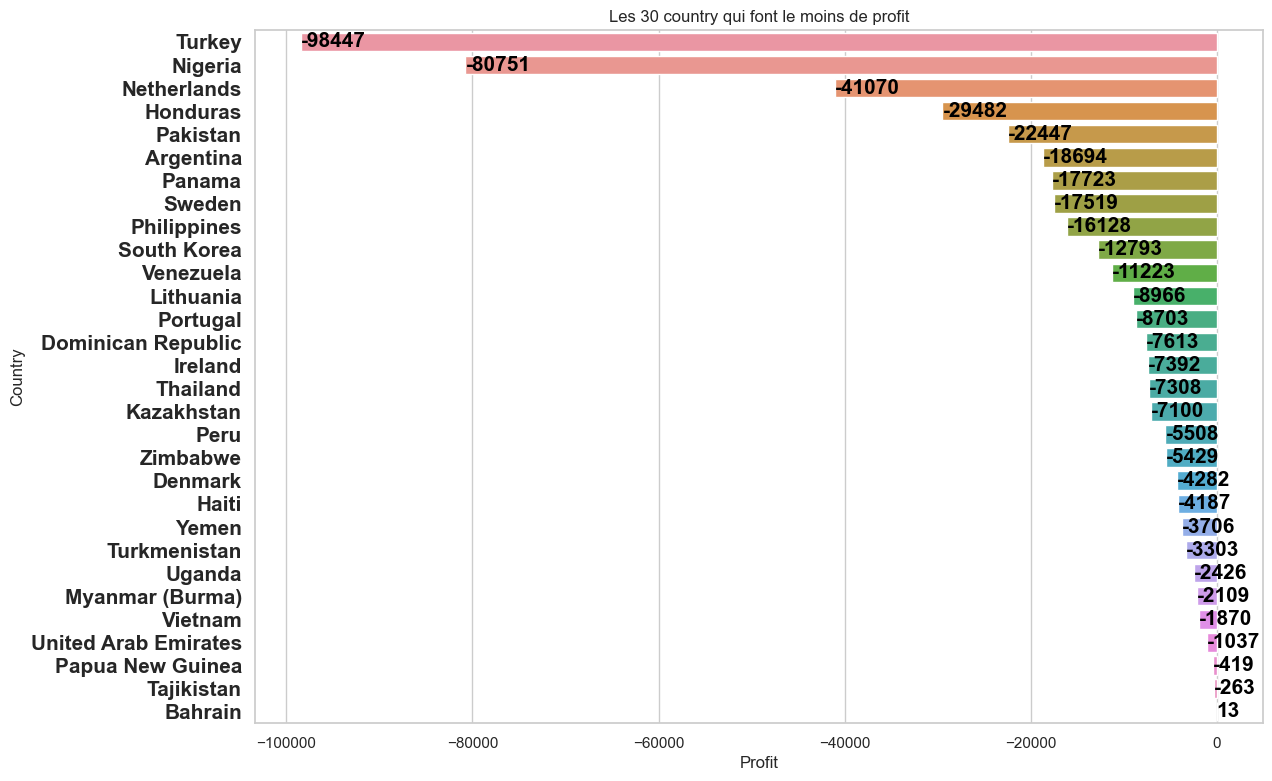

In [ ]:
profit_par_contry = df.groupby('country')['profit'].sum()
twenty_worst_country = profit_par_contry.nsmallest(30)

# Créer un DataFrame à partir de la série twenty_worst_regions
df_profit_par_country = pd.DataFrame({'values': twenty_worst_country})

plt.figure(figsize=(13, 9))  # Réduire la taille pour mieux s'adapter au format horizontal
graph_profit_country = sns.barplot(data=df_profit_par_country, y=df_profit_par_country.index, x='values')  # Inverser x et y
plt.title('Les 30 country qui font le moins de profit')
plt.xlabel('Profit')
plt.ylabel('Country')  # Inverser les labels des axes

# Les valeurs indiquées à droite des barres
for p in graph_profit_country.patches:
    graph_profit_country.annotate('{:.0f}'.format(p.get_width()), (p.get_width(), p.get_y()+0.4),
                        va='center', ha='left',
                        color='black', fontsize=15, fontweight='bold')

plt.yticks(fontsize=15, fontweight='bold')  # Ajuster la taille de la police de l'axe des y
plt.show()


### Les produits qui font le moins de profits

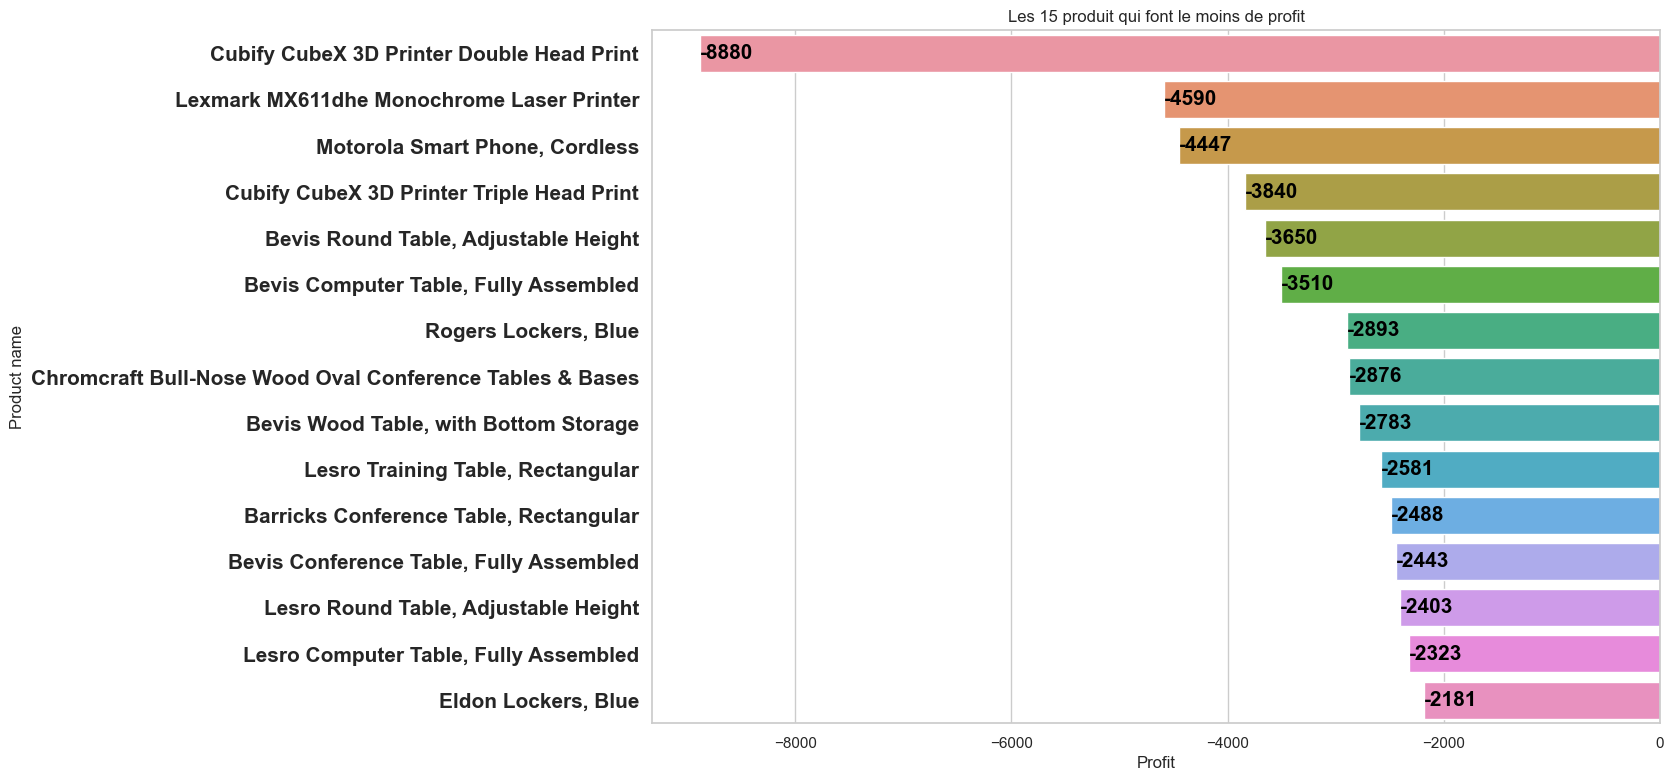

In [ ]:
profit_par_produit_name = df.groupby('product_name')['profit'].sum()
twenty_worst_product = profit_par_produit_name.nsmallest(15)

# Créer un DataFrame à partir de la série twenty_worst_regions
df_profit_par_produit_name = pd.DataFrame({'values': twenty_worst_product})

plt.figure(figsize=(13, 9))  # Réduire la taille pour mieux s'adapter au format horizontal
graph_profit_par_produit_name = sns.barplot(data=df_profit_par_produit_name, y=df_profit_par_produit_name.index, x='values')  # Inverser x et y
plt.title('Les 15 produit qui font le moins de profit')
plt.xlabel('Profit')
plt.ylabel('Product name')  # Inverser les labels des axes

# Les valeurs indiquées à droite des barres
for p in graph_profit_par_produit_name.patches:
    graph_profit_par_produit_name.annotate('{:.0f}'.format(p.get_width()), (p.get_width(), p.get_y()+0.4),
                        va='center', ha='left',
                        color='black', fontsize=15, fontweight='bold')

plt.yticks(fontsize=15, fontweight='bold')  # Ajuster la taille de la police de l'axe des y
plt.show()

### Les vendeurs qui font le moins de profits

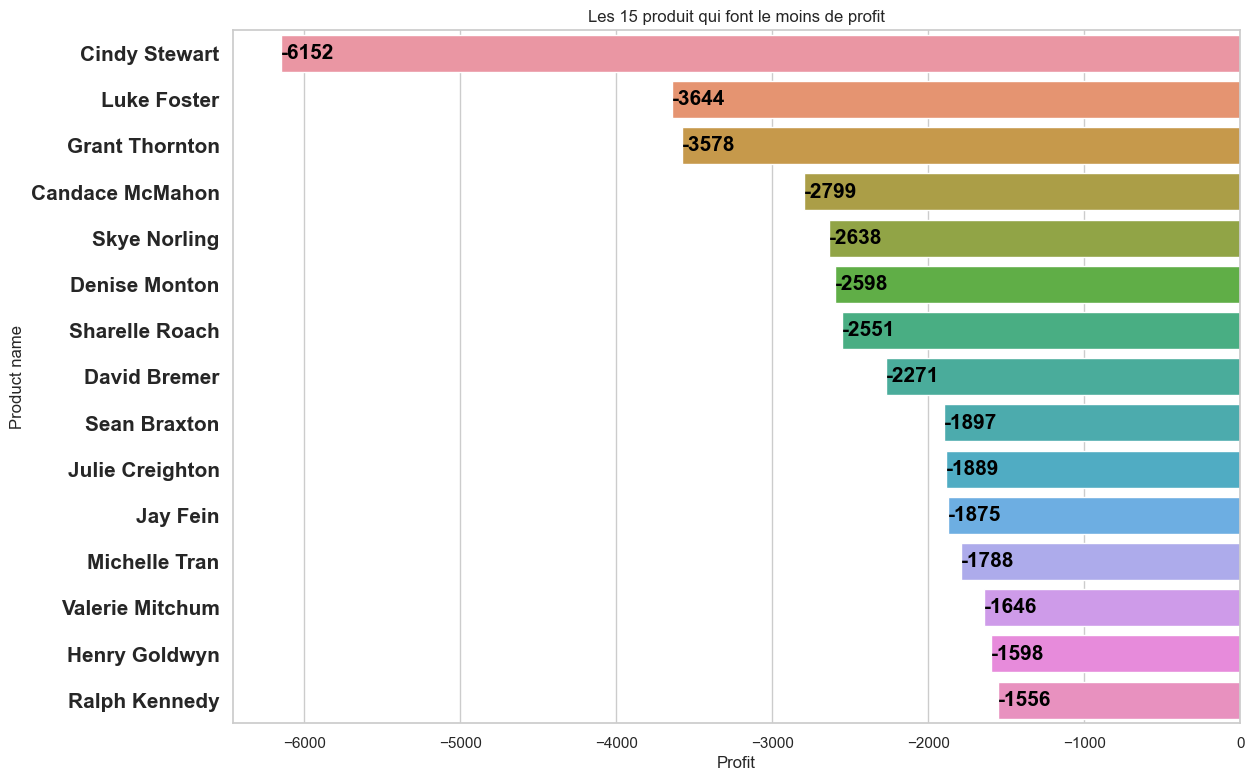

In [ ]:
profit_par_produit_name = df.groupby('customer_name')['profit'].sum()
twenty_worst_product = profit_par_produit_name.nsmallest(15)

# Créer un DataFrame à partir de la série twenty_worst_regions
df_profit_par_produit_name = pd.DataFrame({'values': twenty_worst_product})

plt.figure(figsize=(13, 9))  # Réduire la taille pour mieux s'adapter au format horizontal
graph_profit_par_produit_name = sns.barplot(data=df_profit_par_produit_name, y=df_profit_par_produit_name.index, x='values')  # Inverser x et y
plt.title('Les 15 vendeurs (customer_name) qui font le moins de profit')
plt.xlabel('Profit')
plt.ylabel('Product name')  # Inverser les labels des axes

# Les valeurs indiquées à droite des barres
for p in graph_profit_par_produit_name.patches:
    graph_profit_par_produit_name.annotate('{:.0f}'.format(p.get_width()), (p.get_width(), p.get_y()+0.4),
                        va='center', ha='left',
                        color='black', fontsize=15, fontweight='bold')

plt.yticks(fontsize=15, fontweight='bold')  # Ajuster la taille de la police de l'axe des y
plt.show()

### Les vendeurs qui font le moins de profits (afficher les ventes egalement)

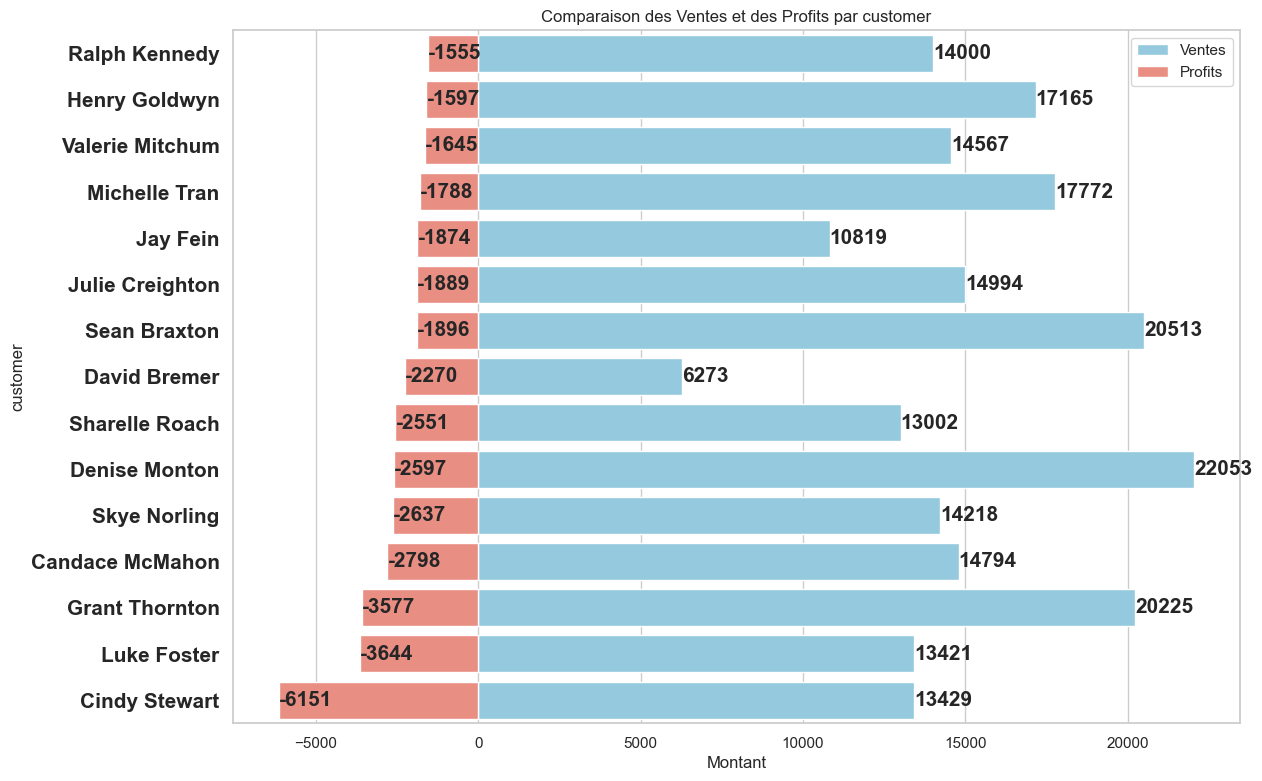

In [ ]:
# Calculer les ventes et les profits par région
ventes_par_region = df.groupby('customer_name')['sales'].sum().reset_index().sort_values(by='sales', ascending=False)
profits_par_region = df.groupby('customer_name')['profit'].sum().reset_index().sort_values(by='profit', ascending=False)

# Fusionner les deux DataFrame
combined_data = pd.merge( profits_par_region, ventes_par_region, on='customer_name', suffixes=('_ventes', '_profits'))

# Sélectionner les 15 premiers pays
combined_data = combined_data.tail(15)

# Créer un graphique des ventes et des profits par région triées de manière horizontale avec les chiffres à droite
plt.figure(figsize=(13, 9))
sns.barplot(x='sales', y='customer_name', data=combined_data, estimator=sum, ci=None, orient='h', color='skyblue', label='Ventes')
sns.barplot(x='profit', y='customer_name', data=combined_data, estimator=sum, ci=None, orient='h', color='salmon', label='Profits')

# Ajouter les chiffres à droite de chaque barre (ventes)
for index, value in enumerate(combined_data['sales']):
    plt.text(value, index, str(int(value)), ha='left', va='center', fontsize=15, fontweight='bold')

# Ajouter les chiffres à droite de chaque barre (profits)
for index, value in enumerate(combined_data['profit']):
    plt.text(value, index, str(int(value)), ha='left', va='center', fontsize=15, fontweight='bold')

plt.title('Comparaison des Ventes et des Profits par customer')
plt.xlabel('Montant')
plt.ylabel('customer')
plt.yticks(fontsize=15, fontweight='bold')
plt.legend()
plt.show()

In [ ]:
import plotly.express as px
import plotly.graph_objs as go

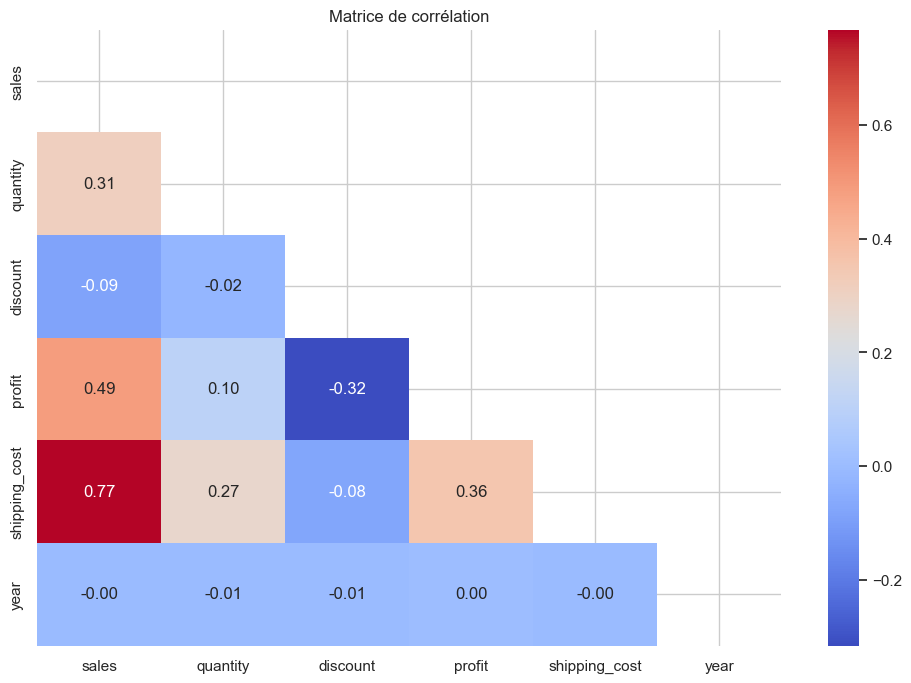

In [ ]:
# Sélectionner les colonnes numériques pour la matrice de corrélation
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculer la matrice de corrélation
corr_matrix = df[numeric_cols].corr()

# Créer un masque pour le triangle supérieur
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Créer la matrice de corrélation avec seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation')
plt.show()

In [ ]:
for col in df.columns:
    print(f'{col:-<50}{df[col].nunique()} éléments uniques')

order_id------------------------------------------25035 éléments uniques
order_date----------------------------------------1430 éléments uniques
ship_date-----------------------------------------1464 éléments uniques
ship_mode-----------------------------------------4 éléments uniques
customer_name-------------------------------------795 éléments uniques
segment-------------------------------------------3 éléments uniques
state---------------------------------------------1094 éléments uniques
country-------------------------------------------147 éléments uniques
market--------------------------------------------7 éléments uniques
region--------------------------------------------13 éléments uniques
product_id----------------------------------------10292 éléments uniques
category------------------------------------------3 éléments uniques
sub_category--------------------------------------17 éléments uniques
product_name--------------------------------------3788 éléments uniques
sales---

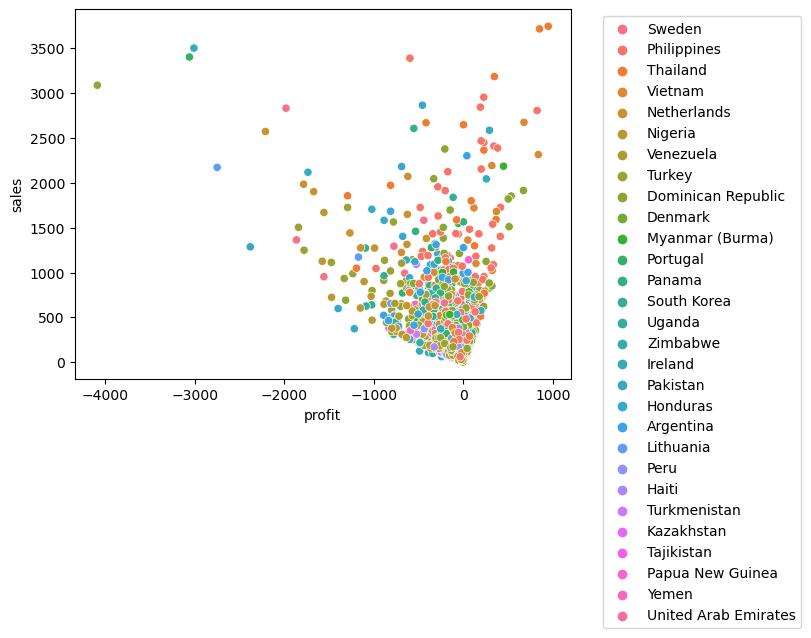

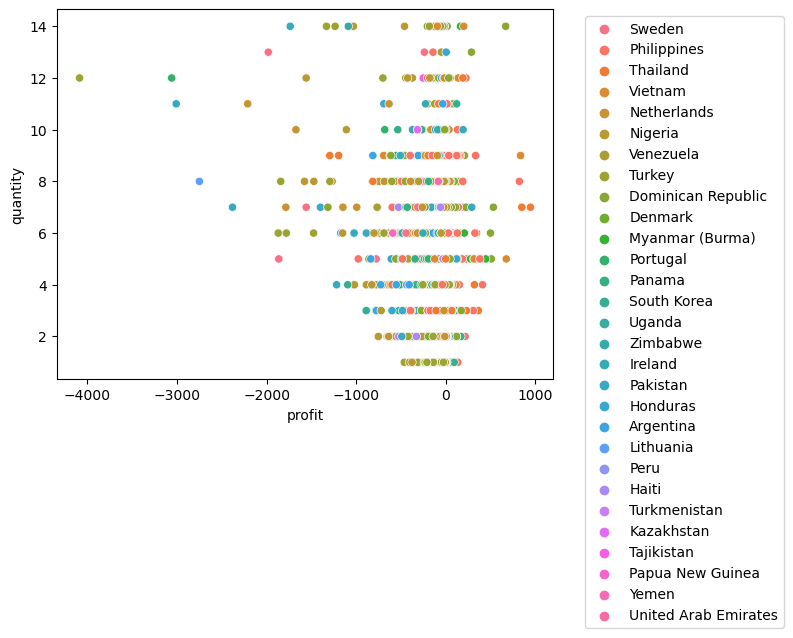

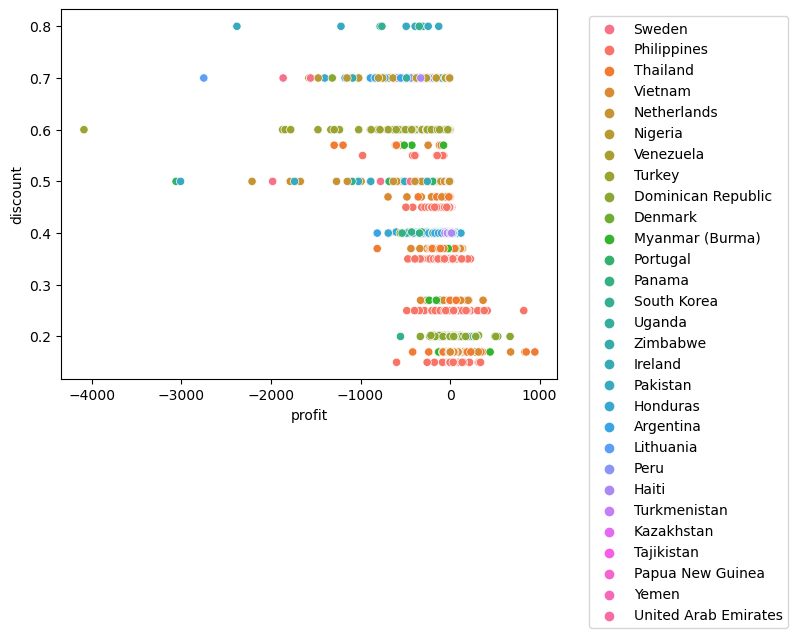

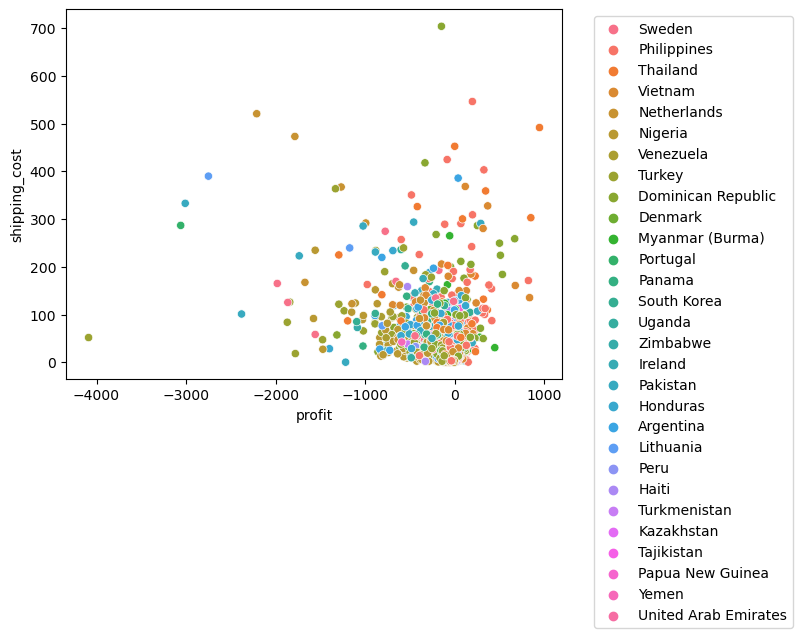

In [ ]:
for col in Cont_Var:
    if col != 'profit':
        # Calculer la moyenne des profits par pays
        average_profit_by_country = df.groupby('country')['profit'].mean()

        # Filtrer les pays avec une moyenne de profit inférieure ou égale à 0
        countries_with_negative_profit = average_profit_by_country[average_profit_by_country <= 0].index

        # Filtrer le DataFrame original pour inclure uniquement les pays avec une moyenne de profit <= 0
        filtered_df = df[df['country'].isin(countries_with_negative_profit)]

        # Créer le graphique avec les pays filtrés
        plt.figure()
        sns.scatterplot(y=col, x='profit', data=filtered_df, hue='country')
        
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.show()

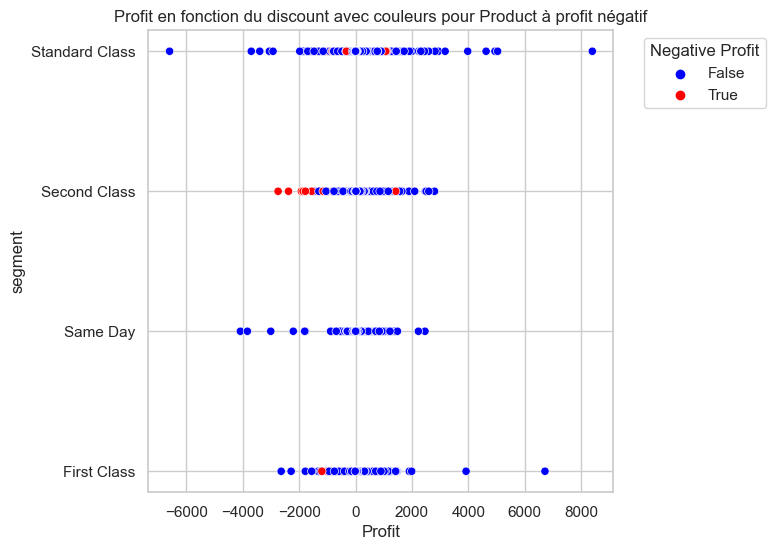

In [ ]:
# Calculer la somme des profits par pays
sum_profit_by_country = df.groupby('sub_category')['profit'].sum()

# Filtrer les pays avec une somme de profit inférieure ou égale à 0
countries_with_negative_profit = sum_profit_by_country[sum_profit_by_country <= 0].index

# Créer une nouvelle colonne pour marquer les pays avec un profit négatif
df['negative_profit'] = df['sub_category'].apply(lambda x: x in countries_with_negative_profit)

# Créer le graphique avec une couleur différente pour les pays avec un profit négatif
plt.figure(figsize=(6, 6))
sns.scatterplot(y='ship_mode', x='profit', data=df, hue='negative_profit', palette={True: 'red', False: 'blue'})

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Negative Profit')
plt.title('Profit en fonction du discount avec couleurs pour Product à profit négatif')
plt.xlabel('Profit')
plt.ylabel('segment')
plt.show()

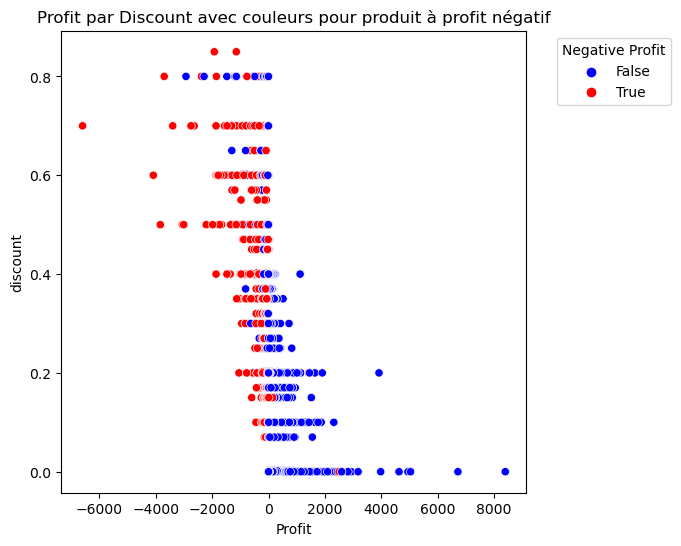

In [12]:
# Calculer la somme des profits par pays
sum_profit_by_country = df.groupby('product_id')['profit'].sum()

# Filtrer les pays avec une somme de profit inférieure ou égale à 0
countries_with_negative_profit = sum_profit_by_country[sum_profit_by_country <= 0].index

# Créer une nouvelle colonne pour marquer les pays avec un profit négatif
df['negative_profit'] = df['product_id'].apply(lambda x: x in countries_with_negative_profit)

# Créer le graphique avec une couleur différente pour les pays avec un profit négatif
plt.figure(figsize=(6, 6))
sns.scatterplot(y='discount', x='profit', data=df, hue='negative_profit', palette={True: 'red', False: 'blue'})

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Negative Profit')
plt.title('Profit par Discount avec couleurs pour produit à profit négatif')
plt.xlabel('Profit')
plt.ylabel('discount')
plt.show()

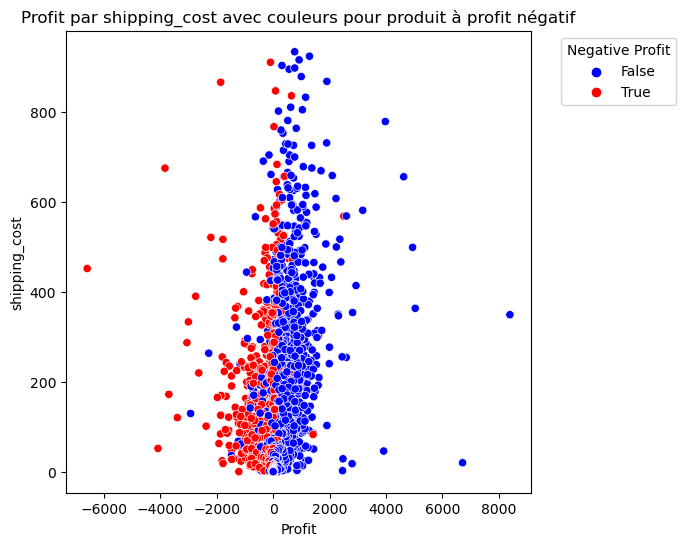

In [14]:
# Calculer la somme des profits par pays
sum_profit_by_country = df.groupby('product_id')['profit'].sum()

# Filtrer les pays avec une somme de profit inférieure ou égale à 0
countries_with_negative_profit = sum_profit_by_country[sum_profit_by_country <= 0].index

# Créer une nouvelle colonne pour marquer les pays avec un profit négatif
df['negative_profit'] = df['product_id'].apply(lambda x: x in countries_with_negative_profit)

# Créer le graphique avec une couleur différente pour les pays avec un profit négatif
plt.figure(figsize=(6, 6))
sns.scatterplot(y='shipping_cost', x='profit', data=df, hue='negative_profit', palette={True: 'red', False: 'blue'})

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Negative Profit')
plt.title('Profit par shipping_cost avec couleurs pour produit à profit négatif')
plt.xlabel('Profit')
plt.ylabel('shipping_cost')
plt.show()

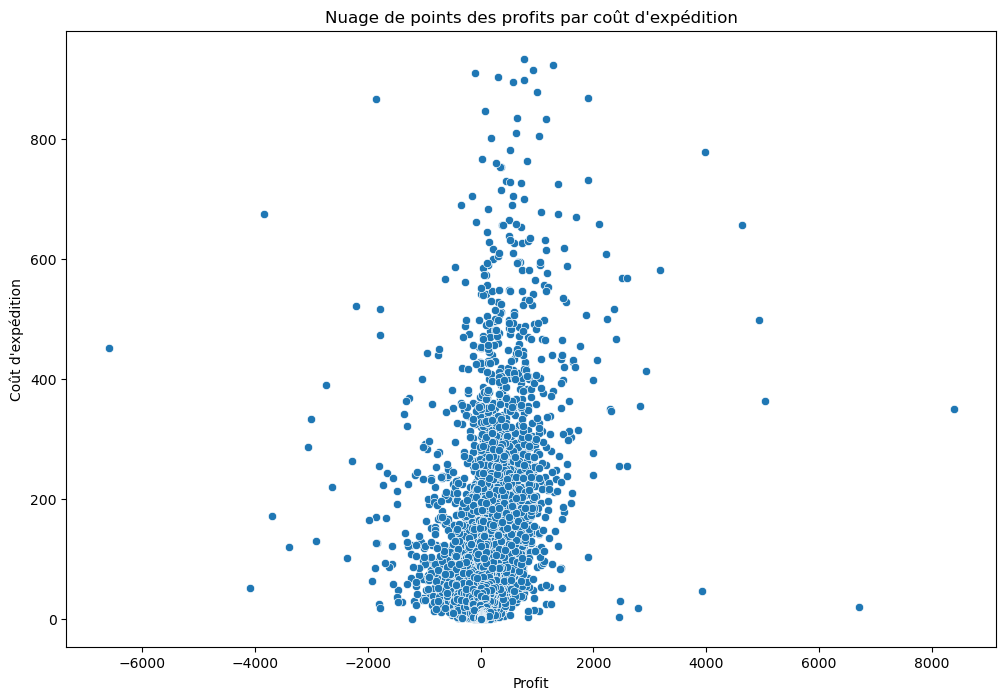

In [16]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='profit', y='shipping_cost')
plt.title('Nuage de points des profits par coût d\'expédition')
plt.xlabel('Profit')
plt.ylabel('Coût d\'expédition')
plt.show()

## Phase negligee: Les valeurs aberante

In [ ]:
# Calculer Q1, Q3 et IQR
Q1 = df['profit'].quantile(0.25)
Q3 = df['profit'].quantile(0.75)
IQR = Q3 - Q1

# Définir les seuils
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifier les valeurs aberrantes
outliers = df[(df['profit'] < lower_bound) | (df['profit'] > upper_bound)]
outliers

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,negative_profit
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Storage,"Tenex Lockers, Blue",408.3000,2,0.00,106.1400,35.46,Medium,2011,False
7,IN-2011-79397,2011-01-03,2011-01-03,Same Day,Kean Nguyen,Corporate,New South Wales,Australia,APAC,Oceania,...,Appliances,"Hoover Microwave, White",276.1020,1,0.10,110.4120,125.32,Critical,2011,False
8,ID-2011-80230,2011-01-03,2011-01-09,Standard Class,Ken Lonsdale,Consumer,Auckland,New Zealand,APAC,Oceania,...,Copiers,"Hewlett Wireless Fax, Laser",912.4560,4,0.40,-319.4640,107.10,Low,2011,False
9,IZ-2011-4680,2011-01-03,2011-01-07,Standard Class,Lindsay Williams,Corporate,Ninawa,Iraq,EMEA,EMEA,...,Chairs,"Novimex Swivel Stool, Set of Two",666.8400,4,0.00,253.3200,81.26,High,2011,False
10,IN-2011-65159,2011-01-03,2011-01-07,Second Class,Larry Blacks,Consumer,National Capital,Philippines,APAC,Southeast Asia,...,Storage,"Tenex Lockers, Industrial",337.6395,3,0.45,-122.8005,33.75,High,2011,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51239,ID-2014-54442,2014-12-31,2015-01-04,Standard Class,Muhammed Yedwab,Corporate,National Capital,Philippines,APAC,Southeast Asia,...,Copiers,"Hewlett Copy Machine, Laser",684.6060,4,0.35,-63.2340,42.92,Medium,2014,True
51245,IN-2014-75603,2014-12-31,2015-01-05,Second Class,Bill Shonely,Corporate,Andhra Pradesh,India,APAC,Central Asia,...,Accessories,"Memorex Keyboard, Erganomic",276.6000,4,0.00,105.0000,21.84,Medium,2014,False
51249,TU-2014-5170,2014-12-31,2015-01-04,Second Class,Valerie Dominguez,Consumer,Konya,Turkey,EMEA,EMEA,...,Furnishings,"Tenex Frame, Erganomic",173.7600,4,0.60,-117.3600,13.72,Medium,2014,True
51252,OD-2014-9490,2014-12-31,2015-01-05,Standard Class,Mitch Willingham,Corporate,Central Equatoria,South Sudan,Africa,Africa,...,Copiers,"Canon Wireless Fax, Digital",378.3000,1,0.00,166.4400,11.71,Medium,2014,False


Au vu de ce resultat il semblerai que nous ayons 9755 valeurs aberantes sur la variable profit

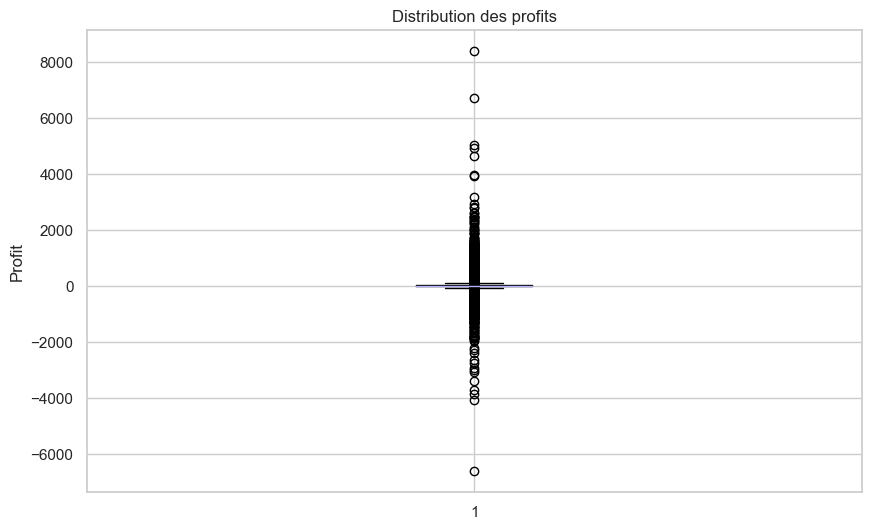

In [ ]:
plt.figure(figsize=(10, 6))
plt.boxplot(df['profit'])
plt.ylabel('Profit')
plt.title('Distribution des profits')
plt.show()

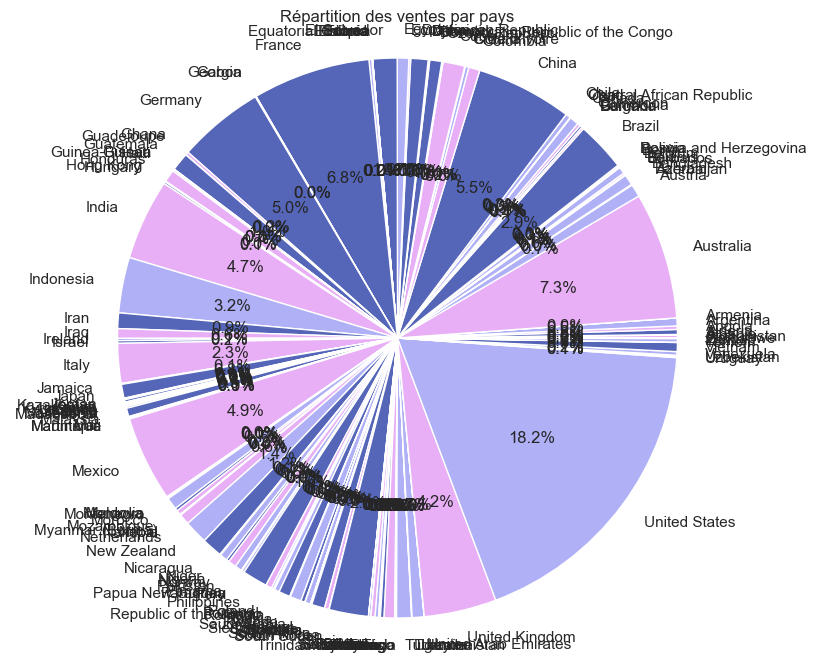

In [ ]:

sales_by_country = df.groupby('country')['sales'].sum()

# Créer un graphique à secteurs
plt.figure(figsize=(10, 8))
plt.pie(sales_by_country, labels=sales_by_country.index, autopct='%1.1f%%')
plt.title('Répartition des ventes par pays')
plt.axis('equal')  # Ajuster les proportions pour un cercle
plt.show()